In [1]:
import pandas as pd

data = pd.read_excel('../data/data.xlsx')
data.head()


,target,userId,sellerId,timestamp,comment
0,1,127,1708,2019-10-01 00:57:45,text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆
1,1,1661,886,2019-10-01 00:42:07,text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×
2,0,92758,10612,2019-10-01 00:51:18,text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...
3,0,1639,1699,2019-10-03 00:01:56,text：谢谢快递哥哥，非常准时，辛苦啦
4,1,241839,36556,2019-10-01 00:07:56,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...


In [2]:
import re

data['comment'] = data['comment'].apply(lambda x: x.replace('text：',''))
data['comment'] = data['comment'].apply(lambda x: re.sub('[^\u4E00-\u9FD5,.?!，。！？、；;:：0-9]+', '', x))
data.head()

,target,userId,sellerId,timestamp,comment
0,1,127,1708,2019-10-01 00:57:45,订餐1个半小时不见餐，催了还挂电话！
1,1,1661,886,2019-10-01 00:42:07,太不靠谱！不是漏发订单就是菜送错了，要不就早送一小时！！！
2,0,92758,10612,2019-10-01 00:51:18,超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好的。推荐推...
3,0,1639,1699,2019-10-03 00:01:56,谢谢快递哥哥，非常准时，辛苦啦
4,1,241839,36556,2019-10-01 00:07:56,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种，面条没有味道，一碗28，坑死爹！！...


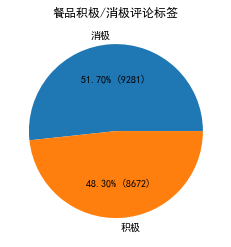

In [3]:
import matplotlib.pyplot as plt

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同时显示数值和占比的饼图
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

num = data['target'].apply(lambda x: '积极' if x == 0 else '消极').value_counts()
plt.figure(figsize=(4,4))
plt.rcParams['font.sans-serif'] = 'Simhei'
plt.pie(num, autopct=make_autopct(num), labels=num.index)
plt.title('餐品积极/消极评论标签')
plt.show()


In [4]:
import jieba
import itertools

with open('../stopword/stopword-cn.txt','r', encoding = 'utf-8') as f:
    stopwords = f.read()
    
stopwords = stopwords.split()
stopwords.append(' ')
stopwords.append('\n')

data_neg = data[data['target'] == 1]
data_pos = data[data['target'] == 0]

data_neg_cut = data_neg['comment'].apply(jieba.lcut)
data_neg_cut = data_neg_cut.apply(lambda x : [i for i in x if i not in stopwords])
print(data_neg_cut.head())

data_pos_cut = data_pos['comment'].apply(jieba.lcut)
data_pos_cut = data_pos_cut.apply(lambda x : [i for i in x if i not in stopwords])
print(data_pos_cut.head())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\16011\AppData\Local\Temp\jieba.cache
Loading model cost 1.983 seconds.
Prefix dict has been built successfully.


0                           [订餐, 半小时, 不见, 餐, 催, 挂, 电话]
1                  [太, 不靠, 谱, 漏发, 订单, 菜, 送错, 早, 送, 小时]
4    [差得, 餐厅, 上菜, 慢, 贵, 属于, 餐厅, 饿死, 那种, 面条, 味道, 一碗,...
6                   [送, 两个, 小时, 解释, 真的, 打电话, 过去, 问, 醉]
7                           [吃, 方便, 似乎, 有股, 异味, .., 闻]
Name: comment, dtype: object
2     [超级, 超级, 喜欢, 吃, 每次, 好开心, 口味, 建议, 手套, 戴, 几双, 吃,...
3                                  [谢谢, 快递, 哥哥, 准时, 辛苦]
5     [这种, 超爱, 美食, 滴, 小孩, 大额, 天堂, 芋, 贵人, 宝珠, 奶酪, 每次,...
9                                          [汤包, 挺好吃, 订]
10                                         [味道, 不错, 实惠]
Name: comment, dtype: object


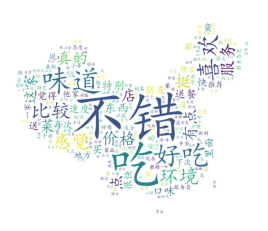

In [5]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

def show(wc, fn=None):
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    if fn is not None:
        wc.to_file(fn)

freq = pd.Series(list(itertools.chain(*list(data_pos_cut)))).value_counts()
mask = np.array(Image.open('../stopword/China.jpg'))
wc = WordCloud(scale=4,
               width=2500, 
               height=3000,
               font_path='C:/Windows/Fonts/simkai.ttf',
               background_color='White', mask=mask)
wc2 = wc.fit_words(freq)
show(wc2, '../stopword/wordcloud.png')

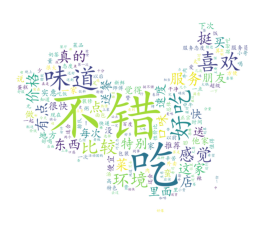

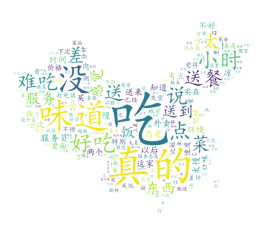

In [6]:
freq_pos = pd.Series(list(itertools.chain(*list(data_pos_cut)))).value_counts()
freq_neg = pd.Series(list(itertools.chain(*list(data_neg_cut)))).value_counts()

wc2_pos = wc.fit_words(freq_pos)
show(wc2_pos, '../stopword/wordcloud_pos.png')

wc2_neg = wc.fit_words(freq_neg)
show(wc2_neg, '../stopword/wordcloud_neg.png')

In [8]:
freq_pos[0:11]

不错    3618
吃     2988
味道    2373
好吃    2069
喜欢    1496
比较     979
环境     932
感觉     812
挺      745
服务     676
价格     676
dtype: int64

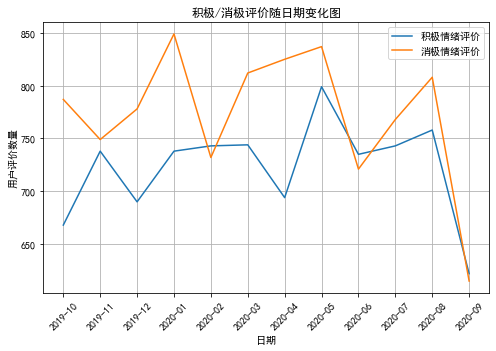

In [93]:
comm_day_pos = data_pos['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts()
comm_day_pos = comm_day_pos.sort_index()
comm_day_neg = data_neg['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts()
comm_day_neg = comm_day_neg.sort_index()

plt.figure(figsize=(8,5))
plt.plot(range(len(comm_day_pos)), comm_day_pos, label='积极情绪评价')
plt.plot(range(len(comm_day_neg)), comm_day_neg, label='消极情绪评价')
plt.xticks(range(len(comm_day_pos)), comm_day_pos.index,rotation=45)
plt.grid()
plt.title('积极/消极评价随日期变化图')
plt.xlabel('日期')
plt.ylabel('用户评价数量')
plt.legend()


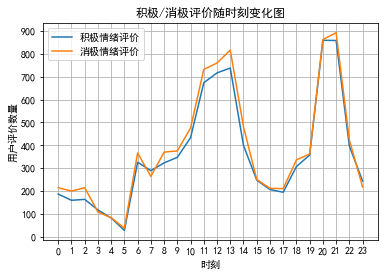

In [86]:
comm_hour_pos = pd.to_datetime(data_pos['timestamp']).apply(lambda x: x.hour).value_counts()
comm_hour_pos = comm_hour_pos.sort_index()

comm_hour_neg = pd.to_datetime(data_neg['timestamp']).apply(lambda x: x.hour).value_counts()
comm_hour_neg = comm_hour_neg.sort_index()

plt.plot(comm_hour_pos.index, comm_hour_pos, label='积极情绪评价')
plt.plot(comm_hour_neg.index, comm_hour_neg, label='消极情绪评价')
plt.title('积极/消极评价随时刻变化图')
plt.xticks(ticks=range(0,24))
plt.yticks(ticks=range(0,1000,100))
plt.xlabel('时刻')
plt.ylabel('用户评价数量')
plt.grid()
plt.legend()

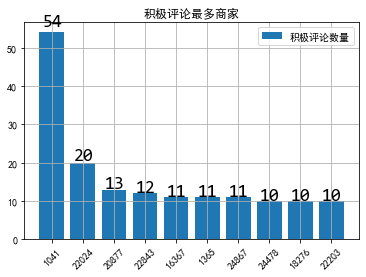

In [62]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.3, 1.03*height, '%s' % int(height), size=18, family="Consolas")

best_sellers = data_pos['sellerId'].value_counts().nlargest(10)
autolabel(plt.bar(range(len(best_sellers[:10])), best_sellers[:10], label='积极评论数量'))
plt.xticks(range(len(best_sellers[:10])), best_sellers[:10].index, rotation=45)
plt.title('积极评论最多商家')
plt.grid()
plt.legend()


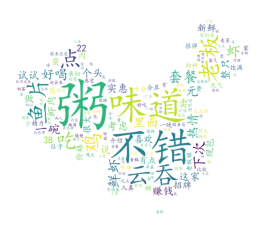

In [78]:
best_seller_comments = data_pos[data_pos['sellerId'] == 20877]['comment']
best_seller_comments_cut = best_seller_comments.apply(jieba.lcut)
best_seller_comments_cut = best_seller_comments_cut.apply(lambda x : [i for i in x if i not in stopwords])
best_seller_comments_freq = pd.Series(list(itertools.chain(*list(best_seller_comments_cut)))).value_counts()
best_seller_comments_freq
best_seller_comments_wc2 = wc.fit_words(best_seller_comments_freq)
show(best_seller_comments_wc2, '../stopword/wordcloud_best_seller.png')

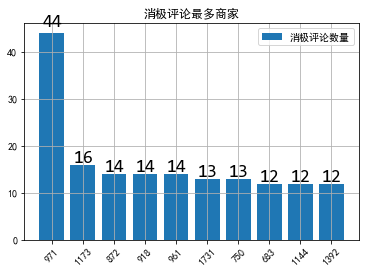

In [81]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.3, 1.03*height, '%s' % int(height), size=18, family="Consolas")

worst_sellers = data_neg['sellerId'].value_counts().nlargest(10)
autolabel(plt.bar(range(len(worst_sellers[:10])), worst_sellers[:10], label='消极评论数量'))
plt.xticks(range(len(worst_sellers[:10])), worst_sellers[:10].index, rotation=45)
plt.title('消极评论最多商家')
plt.grid()
plt.legend()

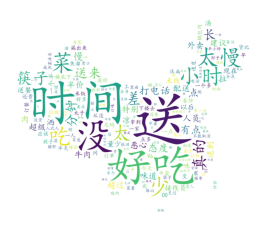

In [86]:
worst_seller_comments = data_neg[data_neg['sellerId'] == 971]['comment']
worst_seller_comments_cut = worst_seller_comments.apply(jieba.lcut)
worst_seller_comments_cut = worst_seller_comments_cut.apply(lambda x : [i for i in x if i not in stopwords])
worst_seller_comments_freq = pd.Series(list(itertools.chain(*list(worst_seller_comments_cut)))).value_counts()
worst_seller_comments_wc2 = wc.fit_words(worst_seller_comments_freq)
show(worst_seller_comments_wc2, '../stopword/wordcloud_worst_seller.png')

In [138]:
from sklearn.model_selection import train_test_split

data_new_pos = pd.DataFrame()
data_new_pos['comment'] = data_pos['comment'].apply(lambda x: str.join('', x))
data_new_pos['label'] = 0
data_new_pos.reset_index(inplace=True,drop=True)

data_new_neg = pd.DataFrame()
data_new_neg['comment'] = data_neg['comment'].apply(lambda x: str.join('', x))
data_new_neg['label'] = 1
data_new_neg.reset_index(inplace=True,drop=True)

data_new = pd.concat([data_new_pos,data_new_neg],axis=0)
data_new.head()

test_ratio = 0.5
src_training, src_testing = train_test_split(data_new, test_size=test_ratio, 
                                             stratify=data_new['label'],random_state=114514)
comments_train = src_training['comment'].values
comments_test = src_testing['comment'].values
y_train = src_training['label'].values
y_test = src_testing['label'].values

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

word_count_train = count_vectorizer.fit_transform(comments_train)
tfidf_train = tfidf_transformer.fit_transform(word_count_train)

word_count_test = count_vectorizer.transform(comments_test)
tfidf_test = tfidf_transformer.transform(word_count_test)

print(tfidf_train.shape, tfidf_test.shape)

(8976, 31336) (8977, 31336)


In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=8, weights= 'distance')
knn.fit(tfidf_train, y_train)
tfidf_y_pred = knn.predict(tfidf_test)
print('tfidf_ KNeighborsClassifier test accuracy %s' % accuracy_score(y_test, tfidf_y_pred))

tfidf_ KNeighborsClassifier test accuracy 0.6883145817088114


In [137]:
len(data)

17953